# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Exploração dos dados

## Carregando a base de dados e explorando suas características

A base de dados que iremos analisar foi adquirida através do Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

Utilizamos a biblioteca do pandas para realizar a importação da base de dados e visualizarmos uma amostra das primeiras cinco linhas do arquivo.

Essa base de dados será utilizada por toda solução.

In [2]:
dataset = pd.read_csv('insurance.csv')

In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
null_cells = dataset.isnull()
total_null_cells = null_cells.sum(axis=0)
total_null_cells

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Aqui podemos verificar que a base de dados possui 1338 linhas e 7 colunas (03 em formato texto e as outras em formato numérico). Podemos analizar também que a base de dados não possui ausência de valores, então não será necessário realizar a limpeza ou remoção de valores nulos.

### Analisando variáveis categóricas

In [7]:
dataset["sex"].value_counts()

,count
sex,
male,676
female,662


In [8]:
dataset["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [9]:
set(dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [10]:
dataset["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Quantidade de fumantes por região

In [11]:
dataset.groupby("region")["smoker"].value_counts().unstack().fillna(0)

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


## Analise estatísticas descritivas e distribuições relevantes

**Análise estatística descritiva**

Através do comando "dataset.describe()" podemos ter uma ideia melhor sobre as nossas variáveis númericas, nos dados uma ideia geral sobre elas.

In [12]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Visualização das distribuições**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

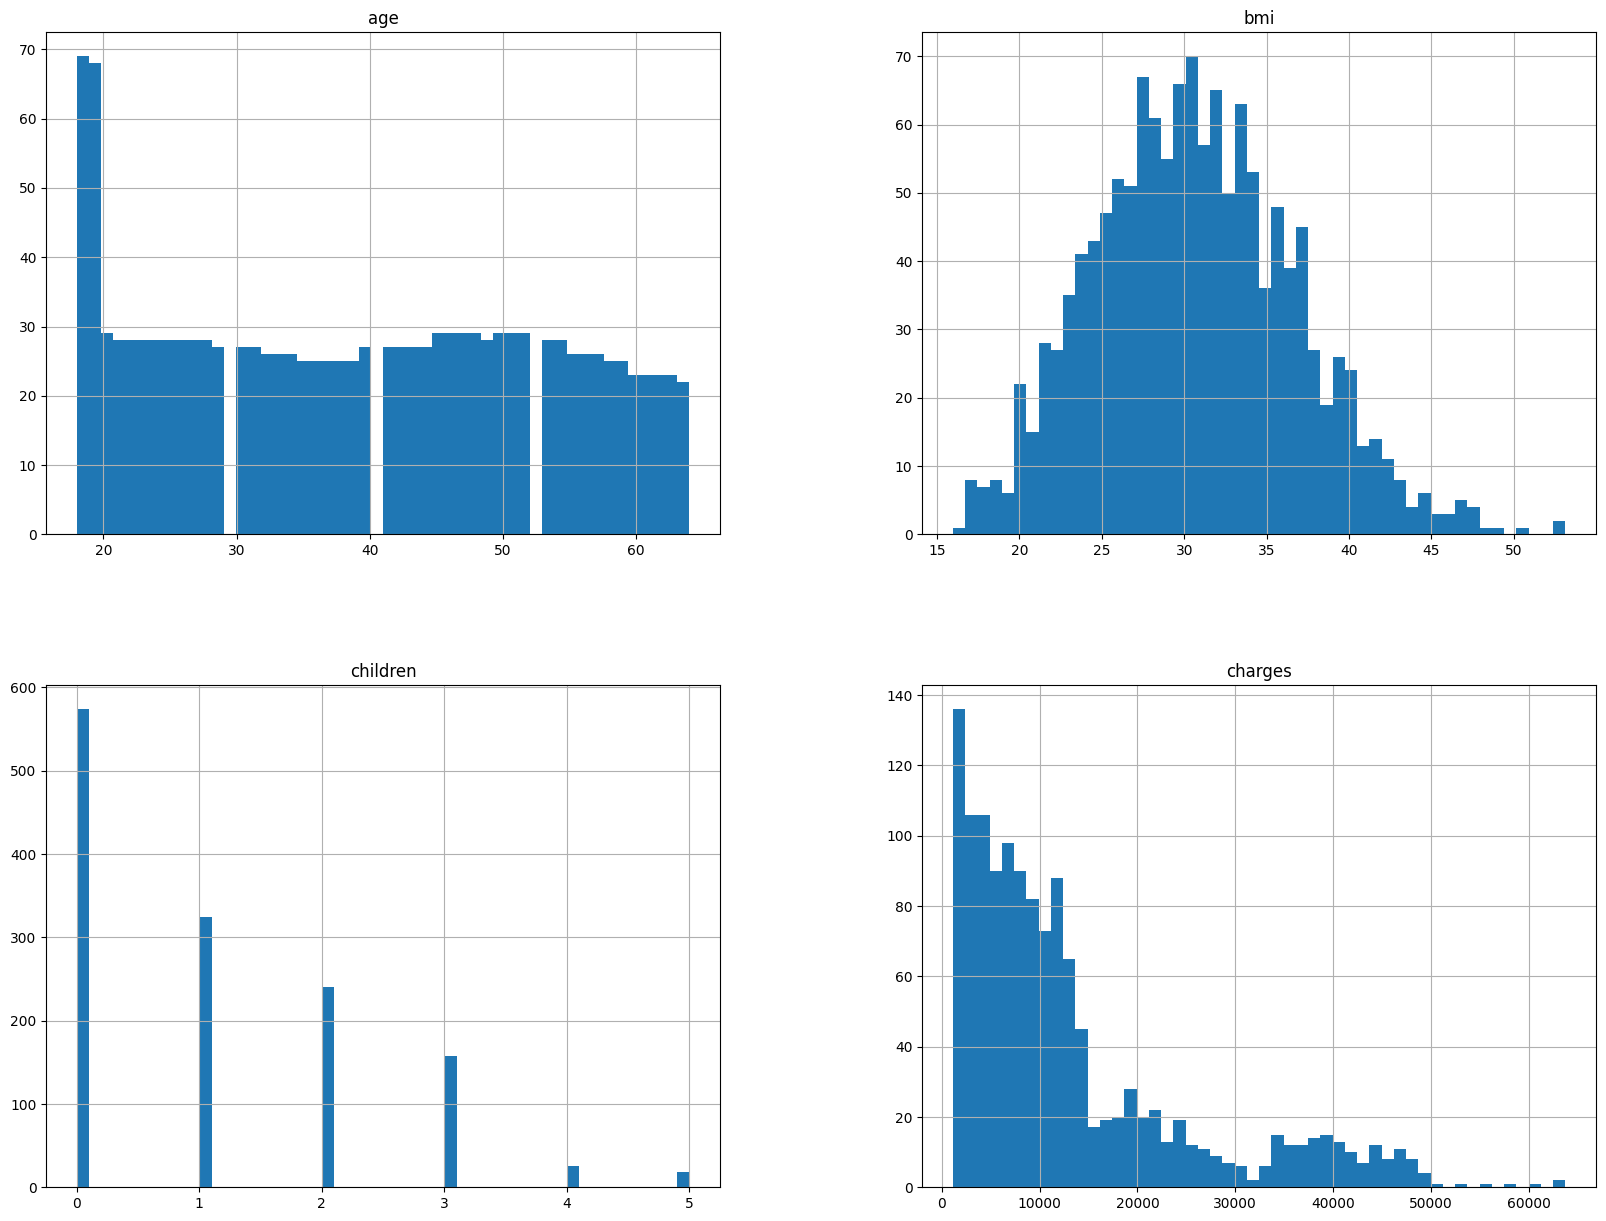

In [13]:
dataset.hist(bins=50, figsize=(20, 15))

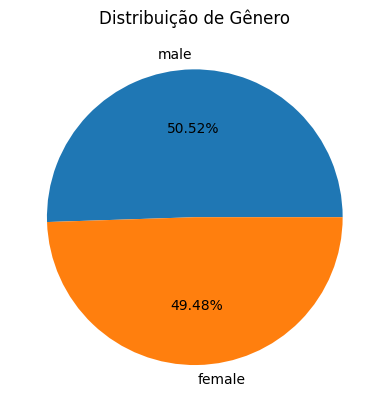

In [14]:
qty_sex = dataset["sex"].value_counts()
plt.pie(qty_sex, labels=qty_sex.index, autopct="%1.2f%%")
plt.title("Distribuição de Gênero")
plt.show()

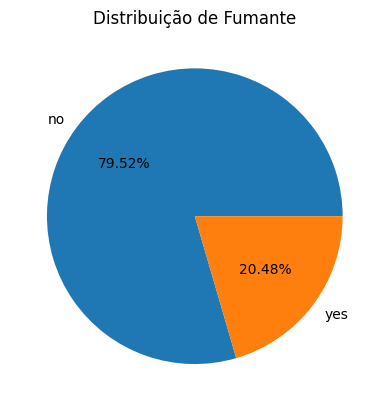

In [15]:
qty_smoker = dataset["smoker"].value_counts()
plt.pie(qty_smoker, labels=qty_smoker.index, autopct="%1.2f%%")
plt.title("Distribuição de Fumante")
plt.show()

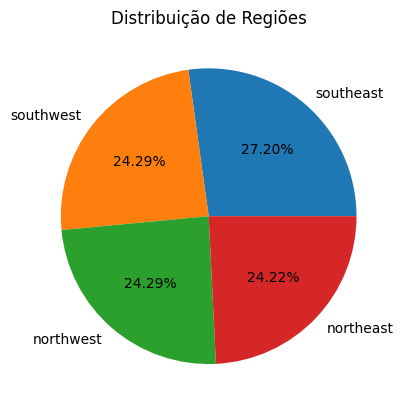

In [16]:
qty_region = dataset["region"].value_counts()
plt.pie(qty_region, labels=qty_region.index, autopct="%1.2f%%")
plt.title("Distribuição de Regiões")
plt.show()

Text(0.5, 1.0, 'Quantidade de fumantes com filhos')

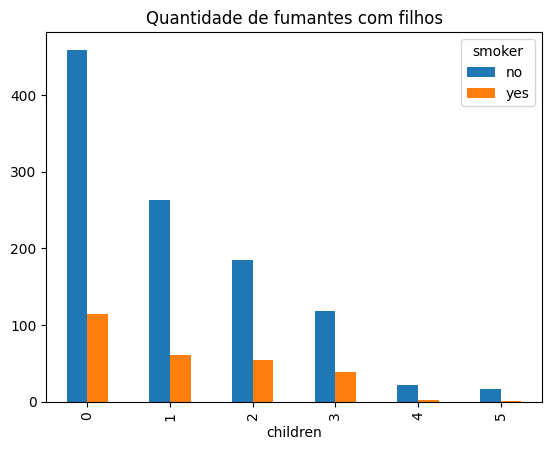

In [17]:
smoker_by_sex = dataset.groupby("children")["smoker"].value_counts().unstack().fillna(0)
smoker_by_sex.plot(kind="bar")
plt.title("Quantidade de fumantes com filhos")

Text(0.5, 1.0, 'Quantidade de fumantes por gênero')

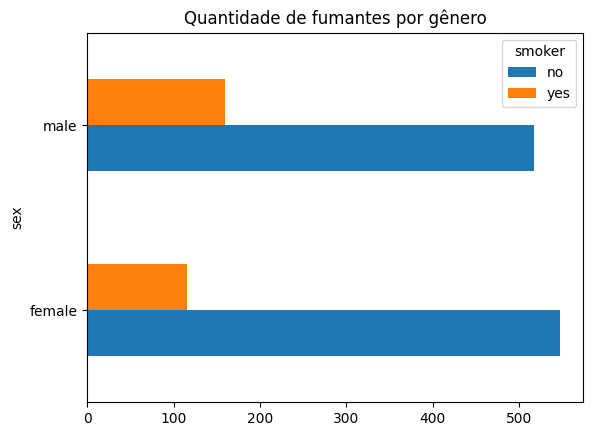

In [18]:
smoker_by_sex = dataset.groupby("sex")["smoker"].value_counts().unstack().fillna(0)
smoker_by_sex.plot(kind="barh")
plt.title("Quantidade de fumantes por gênero")

Text(0.5, 1.0, 'Quantidade de fumantes por região')

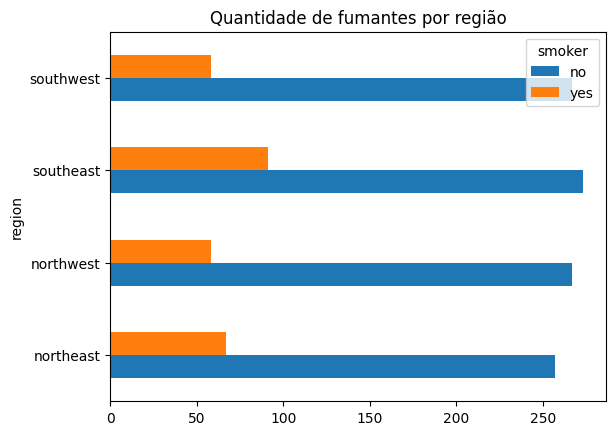

In [19]:
smoker_by_region = dataset.groupby("region")["smoker"].value_counts().unstack().fillna(0)
smoker_by_region.plot(kind="barh")
plt.title("Quantidade de fumantes por região")


Text(0.5, 1.0, 'Quantidade de fumantes por idade')

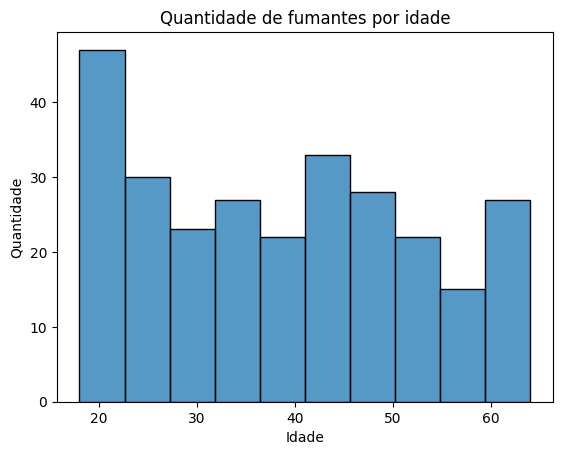

In [20]:
filtered_smoker = dataset[dataset["smoker"] == "yes"]
sb.histplot(filtered_smoker["age"])
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Quantidade de fumantes por idade")

## Analisando os outliers

<Axes: xlabel='charges'>

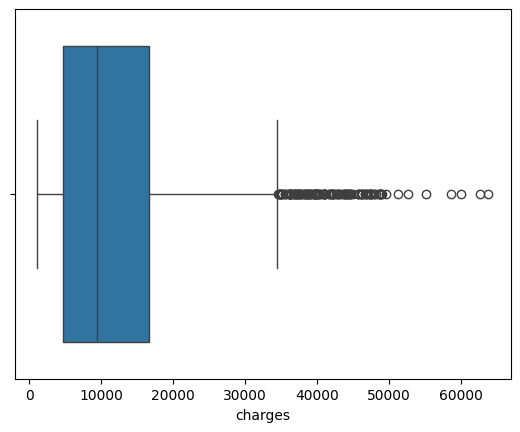

In [21]:
sb.boxplot(x=dataset["charges"])

<Axes: xlabel='bmi'>

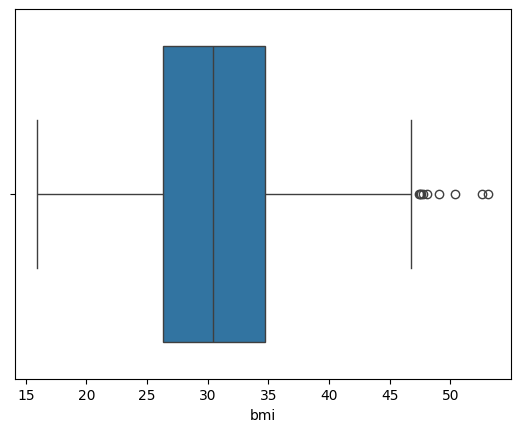

In [22]:
sb.boxplot(x=dataset["bmi"])

<ipython-input-23-dddf956bd31a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="smoker", y="charges", data=dataset, palette="hls")


<Axes: xlabel='smoker', ylabel='charges'>

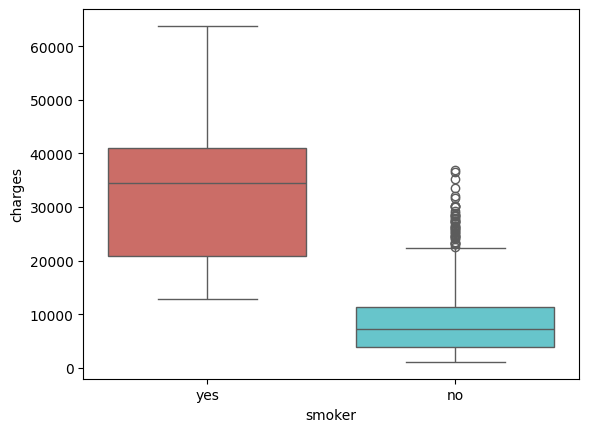

In [23]:
sb.boxplot(x="smoker", y="charges", data=dataset, palette="hls")

<ipython-input-24-9a8d6ea0baac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="sex", y="charges", data=dataset, palette="hls")


<Axes: xlabel='sex', ylabel='charges'>

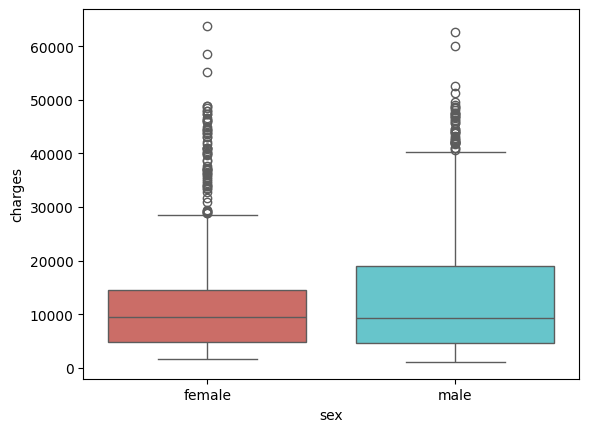

In [24]:
sb.boxplot(x="sex", y="charges", data=dataset, palette="hls")

Quantidade de homens que são outliers

In [25]:
dataset_male_outliers = dataset[(dataset["sex"] == "male") & (dataset["charges"] > 40000)]
dataset_male_outliers["charges"].count()

47

Quantidade de mulheres que são outliers

In [26]:
dataset_male_outliers = dataset[(dataset["sex"] == "female") & (dataset["charges"] > 30000)]
dataset_male_outliers["charges"].count()

59

Quantidade de filhos que são outliers

<ipython-input-27-a041512540ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="children", y="charges", data=dataset, palette="hls")


<Axes: xlabel='children', ylabel='charges'>

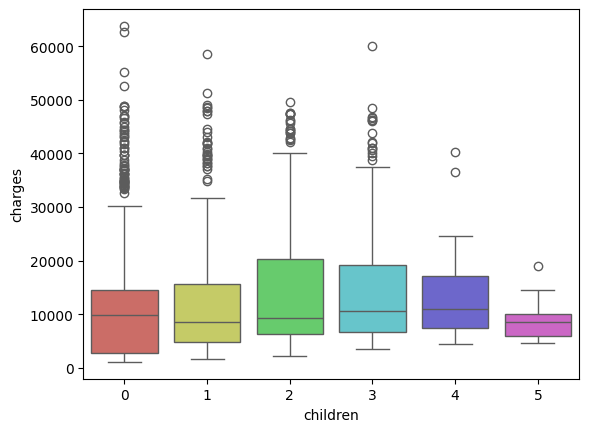

In [27]:
sb.boxplot(x="children", y="charges", data=dataset, palette="hls")

Text(0.5, 1.0, 'Diagrama de dispersão de encargo por idade')

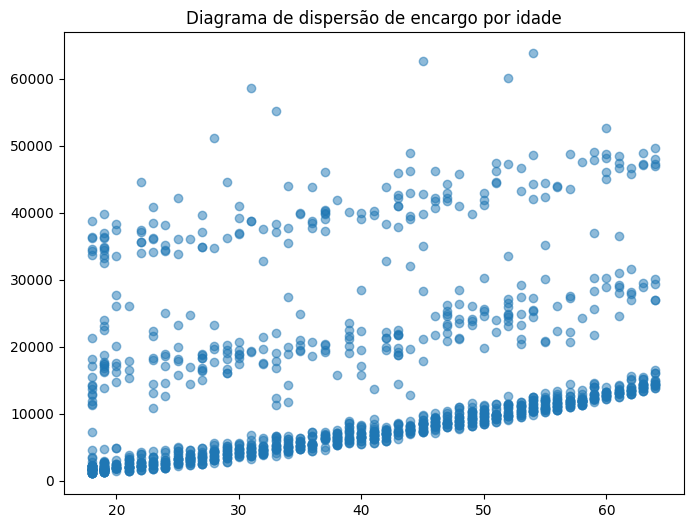

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset["age"], dataset["charges"], alpha=0.5)
plt.title("Diagrama de dispersão de encargo por idade")

Como podemos ver no gráfico de dispersão acima, temos que a concentração dos dados da primeira camada de outliers estão iniciando muito próximo a marca dos U$ 13.000,00 de encargos. Como não há features suficientes que justifiquem esses outliers, iremos remove-los.

# Pré-processamento de dados

## Remoção dos outliers da base de dados

In [29]:
lines_outliers = dataset.sex.count()

In [30]:
index = dataset[(dataset["sex"] == "female") & (dataset["charges"] > 13000)].index
dataset.drop(index, inplace=True)

In [31]:
index = dataset[(dataset["sex"] == "male") & (dataset["charges"] > 13000)].index
dataset.drop(index, inplace=True)

Agora iremos mostrar o gráfico nocamente após a remoção dos outliers.

Text(0.5, 1.0, 'Diagrama de dispersão de encargo por idade')

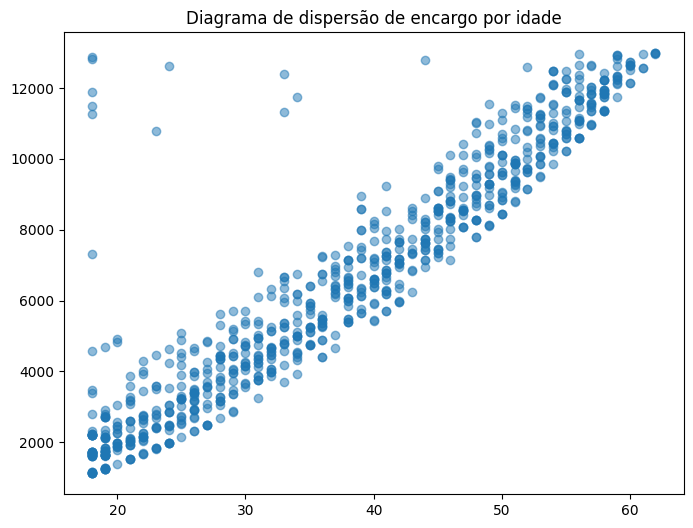

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset["age"], dataset["charges"], alpha=0.5)
plt.title("Diagrama de dispersão de encargo por idade")

<ipython-input-33-9a8d6ea0baac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="sex", y="charges", data=dataset, palette="hls")


<Axes: xlabel='sex', ylabel='charges'>

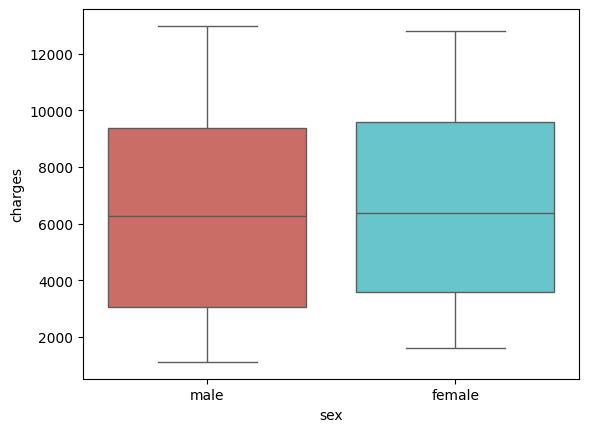

In [33]:
sb.boxplot(x="sex", y="charges", data=dataset, palette="hls")

<ipython-input-34-a041512540ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="children", y="charges", data=dataset, palette="hls")


<Axes: xlabel='children', ylabel='charges'>

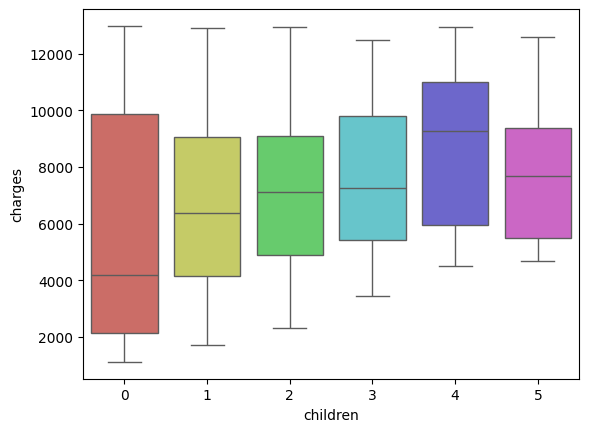

In [34]:
sb.boxplot(x="children", y="charges", data=dataset, palette="hls")

## Conversão de variáveis categóricas em formatos adequados para modelagem

Transforma a coluna smoker em booleano

In [35]:
dataset['smoker'] = dataset['smoker'].replace({'yes': True, 'no': False})

<ipython-input-35-671273a6dc66>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['smoker'] = dataset['smoker'].replace({'yes': True, 'no': False})


Transforma a coluna region em outras 4 colunas: region_northeast, region_northeast, region_southeast, region_southweast.

Essas colunas também tem valores booleanos.

In [36]:
dataset = pd.get_dummies(dataset, columns=['sex', 'region'])
dataset.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
1,18,33.77,1,False,1725.5523,False,True,False,False,True,False
2,28,33.00,3,False,4449.4620,False,True,False,False,True,False
4,32,28.88,0,False,3866.8552,False,True,False,True,False,False
5,31,25.74,0,False,3756.6216,True,False,False,False,True,False
6,46,33.44,1,False,8240.5896,True,False,False,False,True,False


Converte colunas com valores booleanos para valores inteiros

In [37]:
bool_cols = dataset.select_dtypes(include='bool').columns
dataset[bool_cols] = dataset[bool_cols].astype(int)
dataset.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
1,18,33.77,1,0,1725.5523,0,1,0,0,1,0
2,28,33.00,3,0,4449.4620,0,1,0,0,1,0
4,32,28.88,0,0,3866.8552,0,1,0,1,0,0
5,31,25.74,0,0,3756.6216,1,0,0,0,1,0
6,46,33.44,1,0,8240.5896,1,0,0,0,1,0


Os dados estão limpos e organizados!
Tudo pronto para darmos seguimento aos modelos de regressão.

# Modelagem

## Analisando as correlações

In [38]:
corr = dataset.corr()
corr

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109423,0.067436,-0.049611,0.932619,-0.001820,0.001820,-0.024328,0.000149,-0.032816,0.055814
bmi,0.109423,1.000000,0.015562,-0.071652,0.094970,-0.010762,0.010762,-0.145815,-0.131528,0.289626,-0.019703
children,0.067436,0.015562,1.000000,0.025225,0.211349,-0.011070,0.011070,-0.022568,0.006113,-0.024450,0.039901
smoker,-0.049611,-0.071652,0.025225,1.000000,0.060453,-0.033333,0.033333,0.061246,-0.019295,-0.019692,-0.019806
charges,0.932619,0.094970,0.211349,0.060453,1.000000,0.043062,-0.043062,0.045130,0.011160,-0.072342,0.018022
sex_female,-0.001820,-0.010762,-0.011070,-0.033333,0.043062,1.000000,-1.000000,-0.026993,0.007017,-0.005710,0.024546
sex_male,0.001820,0.010762,0.011070,0.033333,-0.043062,-1.000000,1.000000,0.026993,-0.007017,0.005710,-0.024546
region_northeast,-0.024328,-0.145815,-0.022568,0.061246,0.045130,-0.026993,0.026993,1.000000,-0.315034,-0.321523,-0.323378
region_northwest,0.000149,-0.131528,0.006113,-0.019295,0.011160,0.007017,-0.007017,-0.315034,1.000000,-0.342716,-0.344693
region_southeast,-0.032816,0.289626,-0.024450,-0.019692,-0.072342,-0.005710,0.005710,-0.321523,-0.342716,1.000000,-0.351794


<Axes: >

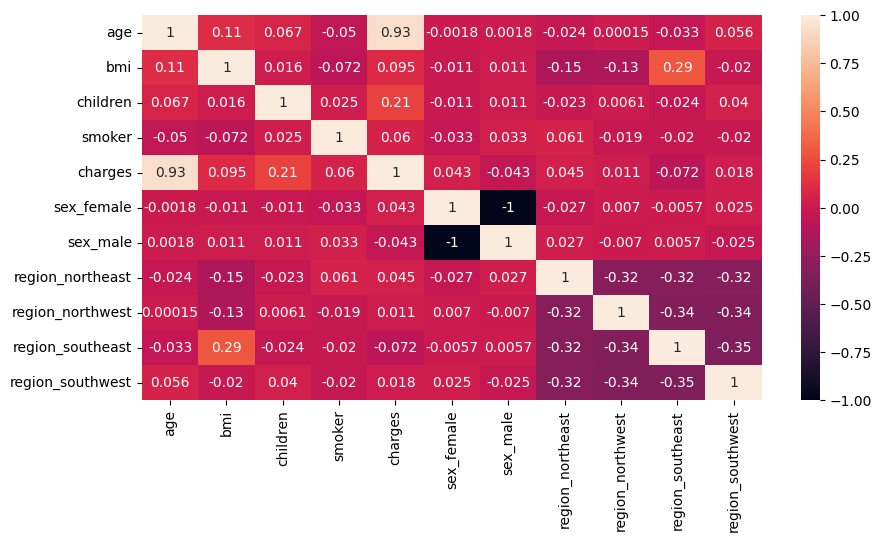

In [39]:
plt.subplots(figsize=(10, 5))
sb.heatmap(corr, annot=True)

## Separando as bases em treino e teste

In [40]:
x = dataset.drop('charges', axis=1)
y = dataset['charges']

In [41]:
# Adicionar constante para o modelo com statsmodels
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
print(len(x_train), "treinamento + ", len(x_test), "teste")

722 treinamento +  181 teste


Padronizando dados de treino e teste

In [43]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaler_train = scaler.fit_transform(x_train)
x_scaler_test = scaler.fit_transform(x_test)

## Regressão Linear Múltipla

A Regressão Linear busca entender o padrão de um valor dependendo de outro ou outros, e assim e encontrar uma função que expressa esse padrão.

A ideia aqui é buscar um padrão entre os dados e coeficientes para poder explicar a nossa target, que no nosso caso são os encargos.

Verificar o quanto a idade, gênero, quantidade de filhos, se é fumante ou não e a região onde a pessoa vive influenciam no valor do encargo.

### Criando Modelo de Regressão Linear

In [44]:
# Calcula Erro Absoluto Percentual Médio
# O MAPE é uma métrica para avaliar os modelos de regressão
def calculate_mape(labels, predictions):
  errors = np.abs(labels - predictions)
  relative_errors = errors / np.abs(labels)
  mape = np.mean(relative_errors) * 100
  return mape;

In [45]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [46]:
x_test.head()

,const,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
112,1.0,37,30.800,0,0,0,1,0,0,0,1
684,1.0,33,18.500,1,0,1,0,0,0,0,1
336,1.0,60,25.740,0,0,0,1,0,0,1,0
389,1.0,24,30.210,3,0,1,0,0,1,0,0
67,1.0,40,26.315,1,0,0,1,0,1,0,0


In [47]:
linear_predictions = linear_regression.predict(x_test)

print('Predições:', linear_predictions[:5])

Predições: [ 5585.07377935  5238.32214181 11258.09767822  4270.43997043
  7027.20116727]


### Avaliando o Modelo de Regressão Linear

In [48]:
mse_linear = mean_squared_error(y_test, linear_predictions)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, linear_predictions)
r2_linear = r2_score(y_test, linear_predictions)

print('Erro Médio Quadrado:', rmse_linear)
print('Erro Médio Absoluto:', mae_linear)
print('R²:', r2_linear)

Erro Médio Quadrado: 804.4934114047452
Erro Médio Absoluto: 483.68525025051457
R²: 0.9455885461593452


In [49]:
mape_result = calculate_mape(y_test, linear_predictions)
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 9.35%


## Árvore de Decisão

A árvore foi ajustada com o máximo de 5 remificações para evitar o overfitting.

### Criando Modelo de Árvore de Decisão

In [50]:
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [51]:
decision_tree_predictions = decision_tree.predict(x_test)

### Avaliando o Modelo de Árvore de Decisão

In [52]:
mse_tree = mean_squared_error(y_test, decision_tree_predictions)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, decision_tree_predictions)
r2_tree = r2_score(y_test, decision_tree_predictions)

print('Erro Médio Quadrado:', rmse_tree)
print('Erro Médio Absoluto:', mae_tree)
print('R²:', r2_tree)

Erro Médio Quadrado: 879.6633390099406
Erro Médio Absoluto: 503.0055710386423
R²: 0.934945351896099


In [53]:
mape_result = calculate_mape(y_test, decision_tree_predictions)
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 13.37%


# Conclusão

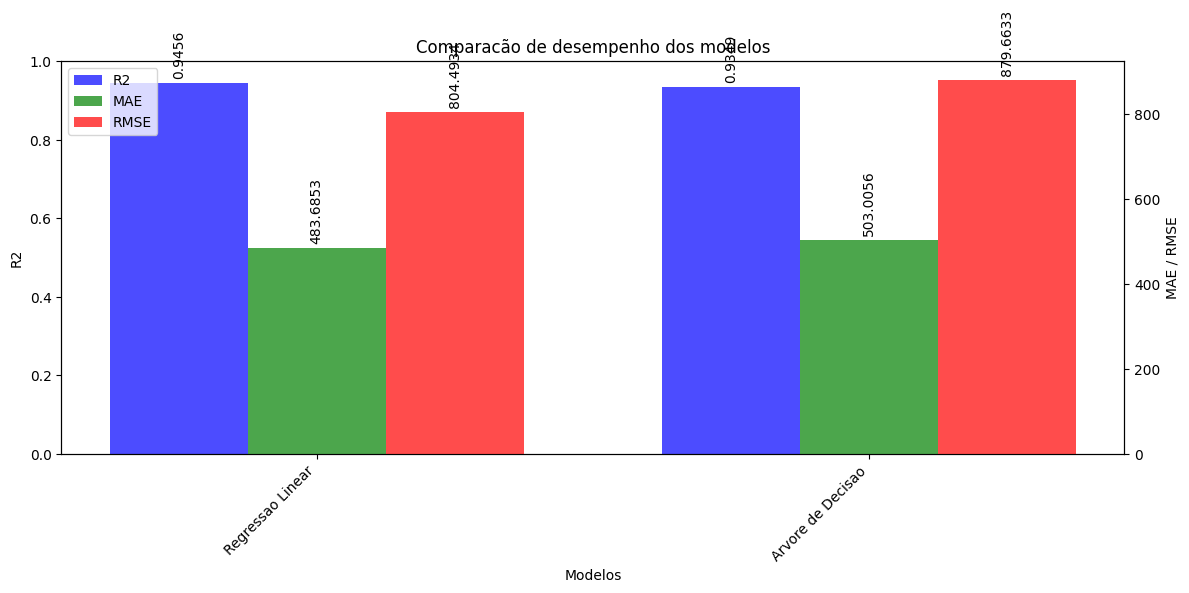

In [54]:
models = ['Regressao Linear', 'Arvore de Decisao']
r2_scores = [r2_linear, r2_tree]
mae_scores = [mae_linear, mae_tree]
rmse_scores = [rmse_linear, rmse_tree]

x = np.arange(len(models)) # posicoes x para as barras
width = 0.25 # largura das barras

fig, ax1 = plt.subplots(figsize=(12, 6))

rects1 = ax1.bar(x - width, r2_scores, width, label='R2', color='blue', alpha=0.7)
ax1.set_ylabel('R2')
ax1.set_ylim(0, 1) # Definir limite do eixi y para R2

ax2 = ax1.twinx()

rects2 = ax2.bar(x, mae_scores, width, label='MAE', color='green', alpha=0.7)
rects3 = ax2.bar(x + width, rmse_scores, width, label='RMSE', color='red', alpha=0.7)
ax2.set_ylabel('MAE / RMSE')

ax1.set_xlabel('Modelos')
ax1.set_title('Comparacão de desempenho dos modelos')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', rotation=90)

autolabel(rects1, ax1)
autolabel(rects2, ax2)
autolabel(rects3, ax2)

plt.tight_layout()
plt.show()

Como pode ser visto acima a Regressão Linear se mostrou mais precisa em relação a Árvore de Decisão.

Descobrindo o valor do encargo usando valores reais, temos que seria de U$ 5.589,75 por ano.

In [55]:
new_data = pd.DataFrame({
    'const': [1.0],
    'age': [33],
    'bmi': [31.54],
    'children': [1],
    'smoker': [0],
    'sex_female': [0],
    'sex_male': [1],
    'region_northeast': [1],
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [0],
})

test_predictions = linear_regression.predict(new_data)
print('Predições:', test_predictions)

Predições: [5723.50543418]
